<br>

<center> <strong> <font face="Courier New" size=5> Reinforcement Learning </font> </strong> </center>
<br>
<center>  <strong> <font face="Courier New" size=6 color='#AB0E6D'> Bono 2 - Algoritmo iteración de valor </font> </strong> </center>

<br>
<center> <p> Docente: Fernando Enrique Lozano Martinez </p>
 <p> 
 Estudiante: <br>
 Manuela Viviana Chacón Chamorro <br>
</p>
</center>

<br> 
<p> IELE <br> 
Facultad de Ingeniería <br>
Universidad de los Andes <br>
2023
</p>

---

In [1]:
# Librerias 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración general de gráficas 
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Enunciado


<p align="justify">
Como se presenta en la Figura 1 se considera la versión con viento de un <em>GridWorld</em> de 4 x 4, lo que equivale a un total de 16 estados. En este <em>GridWorld</em>, el agente puede llevar a cabo las acciones "arriba" "U", "abajo" "D", "derecha" "R" e "izquierda" "L". Al ejecutar una acción, el agente se mueve a la casilla correspondiente con una probabilidad del 0.8, y a la casilla inmediatamente a la derecha de esta con una probabilidad del 0.2. Las casillas resaltadas del tablero indican los estados terminales. Si el agente realiza una acción que lo sacaría de la grilla, permanece en la casilla actual con una probabilidad del 0.8 y se mueve a la casilla a la derecha con una probabilidad del 0.2.
<p align="justify">
Teniendo en cuenta estas dinamicas de movimiento en el gridworl se aplicará el algoritmo de iteración de valor hasta alcanzar la convergencia (aproximada), y se obtendrá la política óptima. 

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1p3mNA-eBzucpY_VE9f7q_iivaJ4DU3g8" width="400"/>
</div>
Figura 1. <em>GridWorld</em> propuesto para el ejercicio. Los estados estados terminales estan resaltados y corresponden al estado 0 y 15. 
</center>


# Análisis de los movimientos

## Movimientos convencionales
<p align="justify">
En las casillas que no sean bordes el agente se mueve en la dirección deseada ("U", "D", "R", "L") con probabilidad 0.8, por acción del viento termina en la casilla a la derecha de donde hubiera quedado por la acción ejecutada con probabilidad 0.2. Considere los siguientes ejemplos:

- Estado 5 y acción "U", el agente llega al estado 1 con probabilidad 0.8 y al estado 2 con probabiidad 0.2.

- Estado 6 y acción "D", el agente llega al estado 10 con probabilidad 0.8 y al estado 11 con probabiidad 0.2.

- Estado 9 y acción "R", el agente llega al estado 10 con probabilidad 0.8 y al estado 11 con probabiidad 0.2.

- Estado 9 y acción "L", el agente llega al estado 8 con probabilidad 0.8 y al estado 9 con probabiidad 0.2.

## Movimientos en los bordes del tablero

En las casillas donde las acciones pueden sacar al agente del gridworld quedará en la misma casilla con probabilidad 0.8 o a la derecha de donde estaba con probabilidad 0.2. Consideremos estos escenarios:

### Acción "U" en el borde superior:

- Estado 1 y acción "U", el agente llega al estado 1 con probabilidad 0.8 y al estado 2 con probabilidad 0.2. 

- Estado 2 y acción "U", el agente llega al estado 2 con probabilidad 0.8 y al estado 3 con probabilidad 0.2. 

- Estado 3 y acción "U", el agente llega al estado 3 con probabilidad 1.


### Acción "D" en el borde inferior.

- Estado 12 y acción "D", el agente llega al estado 12 con probabilidad 0.8 y al estado 13 con probabilidad 0.2. 

- Estado 13 y acción "D", el agente llega al estado 13 con probabilidad 0.8 y al estado 14 con probabilidad 0.2. 

- Estado 14 y acción "D", el agente llega al estado 14 con probabilidad 0.8 y al estado 15 (terminal) con probabilidad 0.2.

### Acción "L" en el borde izquierdo.

- Estado 4 y acción "L", el agente llega al estado 4 con probabilidad 0.8 y al estado 5 con probabilidad 0.2. 

- Estado 8 y acción "L", el agente llega al estado 8 con probabilidad 0.8 y al estado 9 con probabilidad 0.2. 

- Estado 12 y acción "L", el agente llega al estado 12 con probabilidad 0.8 y al estado 13 con probabilidad 0.2

### Acción "R" en el borde derecho.

- Estado 3 y acción "R", el agente llega al estado 3 con probabilidad 1. 

- Estado 7 y acción "R", el agente llega al estado 7 con probabilidad 1.

- Estado 11 y acción "R", el agente llega al estado 11 con probabilidad 1.

## Consideraciones especiales

Tambien es necesario analizar que el agente en los estados 3, 7 y 11 al aplicar la acción "D" queda con probabilidad 1 en las casillas 7, 11 y 15, respectivamente. En los estados 2, 6, 10 y 14 si se aplica la acción "R" el agente queda, con probabilidad 1, en los estados 3, 7, 11 y 15. 

# Configuración inicial del tablero

Para configurar el tablero se construyen los espacios de memoria para los estados, las acciones y las banderas, estas ultima indican si el agente llega a un estado terminal. 

In [2]:
boardState = range(0,16) # Creación de estados
actionAvailable = ['U', 'D', 'R', 'L'] # Creación de acciones disponibles, arriba, abajo, derecha e izquierda
gameOver = {s: True if s == 0 or s == 15 else False for s in boardState} # Banderas que indican si el juego termina

# Probabilidades MDP
<p align="justify">
Para realizar el algoritmo de iteración de valor, es necesario estimar las probabilidades del MDP definidas como:

$$p(s',r | s, a) = Pr\{S_t = s', R_t = r | S_{t-1} = s, A_{t-1} = a\}$$
<p align="justify">
En el gridworld planteado, la recompensa es determinística y corresponde al valor de -1 para cualquier transición. Entonces, para los estados $s'$ en los cuales la recompensa sea -1, la probabilidad $p(s',r | s, a)$ será igual a la probabilidad de transición $p(s'| s, a)$, y en otro caso será 0. Por esta razón, solo se estiman las probabilidades de transición, las cuales son suficientes para definir el comportamiento del MDP.

<p align="justify">
Inicialmente, se define el espacio en memoria para las probabilidades $p(s'|s,a)$, las cuales se guardarán en un diccionario indexado por tuplas de la forma $(s,s',a)$. Teniendo en cuenta que $p(s'|s,a) : S\times S \times A(s) \to [0,1]$, este diccionario tendrá $16 \times 16 \times 4 = 1024$ posiciones.  

In [3]:
probabilitiesTransition = {(s,sNew,a): 0 for s in boardState for sNew in boardState for a in actionAvailable}

La siguiente función agrega el valor de las probabilidades de acuerdo con el análisis de los movimientos realizados en la sección anterior 

In [4]:
def transitionProbabilitiesSimple(boardState, actionAvailable, probabilitiesTransition):
    # Esta función calcúla las probabilidades de transición del gridworl de 4 x 4 con viento
    # Parámetros 
    # boardState = lista de estados
    # actionAvailable = lista de acciones posibles
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) inicalizado en 0

    # Retorna 
    # probabilitiesTransition = diccionario indexado con tuplas (s', s, a) para todos los estados y todas las acciones
    
    for action in actionAvailable:
      # Acción arriba 
      if action == 'U':
        for state in boardState[1:-1]: 
          for state_new in boardState: 
              if state in [1, 2, 3]: # Análisis estados borde superior
                if state != 3:
                  probabilitiesTransition[(state, state, action)] = 0.8
                  probabilitiesTransition[(state+1, state, action)] = 0.2
                else:
                  probabilitiesTransition[(state, state, action)] = 1 # El estado 3 si va hacia arriba termina otra vez en 3
              else: # Análisis para cualquier estado no especial para esta acción
                if state_new == state - 4: # Acción arriba
                    probabilitiesTransition[(state_new, state, action)] = 0.8 
                elif state_new == state - 3: # Casilla a la derecha de la acción arriba
                    probabilitiesTransition[(state_new, state, action)] = 0.2
      # Acción abajo 
      if action == 'D':
        for state in boardState[1:-1]:
          for state_new in boardState:
              if state in [12, 13, 14]: # Análisis bordes inferiores 
                probabilitiesTransition[(state, state, action)] = 0.8
                probabilitiesTransition[(state + 1, state, action)] = 0.2
              elif state in [3, 7, 11]: # Análisis bordes derechos 
                probabilitiesTransition[(state + 4, state, action)] = 1
              else: # Análisis para cualquier estado no especial para esta acción 
                if state_new == state + 4: # Acción abajo
                    probabilitiesTransition[(state_new, state, action)] = 0.8 
                elif state_new == state + 5: # Casilla a la derecha de la acción abajo
                    probabilitiesTransition[(state_new, state, action)] = 0.2
      # Acción derecha   
      if action == 'R':
        for state in boardState[1:-1]:
          for state_new in boardState:
              if state in [3, 7, 11]: # Análisis bordes derechos 
                probabilitiesTransition[(state, state, action)] = 1
              elif state in [2, 6, 10, 14]: # Análisis columna penúltima
                probabilitiesTransition[(state+1, state, action)] = 1
              else: # Análisis para cualquier estado no especial para esta acción  
                if state_new == state + 1: # Acción derecha
                    probabilitiesTransition[(state_new, state, action)] = 0.8 
                elif state_new == state + 2: # Casilla a la derecha de la acción derecha
                    probabilitiesTransition[(state_new, state, action)] = 0.2
      # Acción izquierda 
      if action == 'L':
        for state in boardState[1:-1]:
          for state_new in boardState:
              if state in [4, 8, 12]: # Análisis bordes izquierdos
                probabilitiesTransition[(state, state, action)] = 0.8
                probabilitiesTransition[(state+1, state, action)] = 0.2
              else: # Análisis para cualquier estado no especial para esta acción 
                if state_new == state - 1: # Acción izquierda
                    probabilitiesTransition[(state_new, state, action)] = 0.8 
                elif state_new == state: # Casilla a la derecha de la acción izquierda 
                    probabilitiesTransition[(state_new, state, action)] = 0.2

    return probabilitiesTransition

In [5]:
probabilitiesTransition =  transitionProbabilitiesSimple(boardState, actionAvailable, probabilitiesTransition)

Las probabilidades de transición, por definición de probabilidad, satisfacen para todo $s$ y $a$ que 

$$\sum_{s'} p(s'|s,a) = 1$$

Para verificar que se ha planteado de forma adecuada estas probabilidades se verifica que la sumatoria, sobre los estado posibles ($s'$), para cada estado y cada acción sea igual a la unidad. 

In [6]:
for s in boardState:
  for a in actionAvailable:
    print(f'Para el estado {s} y la acción {a}:')
    pSum = 0
    for sNew in boardState:
      pSum += probabilitiesTransition[(sNew, s, a)]
    print(f'La suma de las probabilidades de transición es {pSum}')
  print('\n')

Para el estado 0 y la acción U:
La suma de las probabilidades de transición es 0
Para el estado 0 y la acción D:
La suma de las probabilidades de transición es 0
Para el estado 0 y la acción R:
La suma de las probabilidades de transición es 0
Para el estado 0 y la acción L:
La suma de las probabilidades de transición es 0


Para el estado 1 y la acción U:
La suma de las probabilidades de transición es 1.0
Para el estado 1 y la acción D:
La suma de las probabilidades de transición es 1.0
Para el estado 1 y la acción R:
La suma de las probabilidades de transición es 1.0
Para el estado 1 y la acción L:
La suma de las probabilidades de transición es 1.0


Para el estado 2 y la acción U:
La suma de las probabilidades de transición es 1.0
Para el estado 2 y la acción D:
La suma de las probabilidades de transición es 1.0
Para el estado 2 y la acción R:
La suma de las probabilidades de transición es 1
Para el estado 2 y la acción L:
La suma de las probabilidades de transición es 1.0


Para el 

<p align="justify">
Como se verificó para los estados 1 a 14 y las acciones disponibles, la suma sobre los estados posibles $s'$ es igual a la unidad. En los estados 0 y 15, los cuales son terminales, se puede observar que las probabilidades de ir desde estos estados a otros son nulas. Esto se debe a que, al ser terminales, no conducen a otro estado. 

# Algoritmo iteración de valor 

El algoritmo de iteración de valor implementa en un solo paso la estimación y mejora de la función de valor. Este proceso se realiza mediante la regla de actualización:

 $$V_{t}(s) = \max_{a} \sum_{s',r} p(s', r| s,a)(r + \gamma V_{t-1}(s'))$$

Después de suficientes iteraciones, el algoritmo converge a una función de valor óptima, la cual tiene asociada una política óptima $\pi_{\star}$.

<p align="justify">
Dado que se tiene un escenario con recompensas determinísticas, como ya se estableció que $p(s', r| s,a) = p(s'| s,a)$ si la recompensa $r = R(s)$ es igual a la recompensa observada en ese estado y $0$ en cualquier otro caso, entonces para este caso específico, la regla de actualización se escribe como:

$$V_{t}(s) = \max_{a} \sum_{s'} p(s'| s,a)(r + \gamma V_{t}(s'))$$
<p align="justify">

En cuanto a la política, al finalizar el ciclo de iteraciones será greedy respecto a $V(s)$:

$$\pi_(s) = \arg\max_{a} \sum_{s'} p(s'| s,a)(r + \gamma V(s'))$$

<p align="justify">
A continuación se presenta una función que implementa el algoritmo de iteración de valor para el gridworld. Esta función toma como entrada los estados, las probabilidades de transición, el número de iteraciones y el factor de descuento $\gamma$.

In [7]:
def betterPolicyValueIteration(boardState, gamma, probabilitiesTransition, iteration):
    # Función de cálculo de la politica y función de valor óptimas
    # Parámetros
    # gamma = Factor de descuento 
    # probabilitiesTransition diccionario con las probabilidades de transición
    # iteration = Número de iteraciones del proceso 

    # Retorna 
    # values = Función de valor óptima para cada estado
    # policy = Política óptima para cada estado 
    # sigma = Error final proceso 
    # sigmas = Error en cada iteración max(sigma, |v - V(s)|)


    values = dict.fromkeys(boardState , 0.0) # Diccionario con valores de v(s) en función del estado 
    policy = dict.fromkeys(boardState , 0.0) # Diccionario con valores de la política en función del estado

    sigmas = [] # Errores máximos de estimación en cada iteración 
    sigma = 0 # Incluido para visualizar la iteración 0 
    # Inicia ciclo de programación dinámica 
    for k in range(iteration): 
      newValues = dict.fromkeys(boardState , 0.0)
      sigma = 0

      # Cálculo de la función de valor V(s)
      for state in boardState:
        # Para estados terminales no hay actualización 
        doneFlag = gameOver[state]
        if doneFlag:
            newValues[state] = 0
            policy[state] = 'Estado Terminal'
        else:
            valueActions = []
            actionEvaluated = []
            for action in actionAvailable:
                valueAction = 0
                for newState in boardState: # Ciclo de suma sobre todos los posibles valores de s'
                    reward = -1 # Recompensa -1 en todas las transiciones 
                    valueAction += probabilitiesTransition[(newState, state, action)]*(reward + gamma*values[newState]) 
                valueActions.append(valueAction)
                actionEvaluated.append(action)
            newValues[state] = np.max(valueActions)
        errorAbsVs = abs(values[state] - newValues[state])
        sigma= max(sigma, errorAbsVs)  
      sigmas.append(sigma)
      values = newValues
      del newValues

    # Cálculo de la política greedy respecto a V(s). 
    for state in boardState:        
      valueActionsPolicy = []
      actionEvaluatedPolicy = []
      for action in actionAvailable:
          valueActionPolicy = 0
          for newState in boardState: # Ciclo de suma sobre todos los posibles valores de s'
              reward = -1 # Recompensa -1 en todas las transiciones 
              valueActionPolicy += probabilitiesTransition[(newState, state, action)]*(reward + gamma*values[newState]) 
          valueActionsPolicy.append(valueActionPolicy)
      # En la ejecución del algoritmo se observó que numéricamente generaba diferencias 
      # para estados que en un cálculo manual estos estados eran los mismos 
      # por ejemplo el estado -3 era diferente de -3.00000004 
      # para corregir esta condición se realiza un redondeo del valor en 4 decimales 
      valueActionsPolicyRound = [round(values, 4) for values in valueActionsPolicy]
      for x in np.where(valueActionsPolicyRound == np.max(valueActionsPolicyRound)):
        policy[state] = [actionAvailable[index] for index in x.tolist()]  

    return values, policy, sigma, sigmas

Para visualizar la función de valor y la política encontrada se proponen las siguientes funciones:

In [8]:
def makeMatrixVs(values):
  # Función que construye una matriz para la función de valor con la estructura del gridworld 
  # Parámetros
  # values = diccionario de la función de valor 
  # Retorna 
  # matrixVs = matriz con la función de valor 
  # matrixState = matriz con los estados dispuesto en el orden del gridworld 

  matrixVs = np.zeros((4, 4))
  matrixState = np.zeros((4, 4))

  for i in boardState:
      row = (i) // 4  
      col = (i) % 4  
      matrixVs[row, col] = values.get(i, 0)
      matrixState[row, col] = i
  return matrixVs, matrixState

In [9]:
def visualizatedPolicy(policy, matrixVs, matrixState):
  # Función que visualiza en un mapa de calor la matriz con la estructura del gridworld
  # de la función de valor y la política gredy respecto esta función de valor  
  # Parámetros
  # policy = diccionario con la política para cada estado 
  # matrixVs = matriz con la función de valor 
  # Retorna 
  # visualización del mapa de calor
  
  fig, ax = plt.subplots(1,2, figsize=(15,5))

  sns.heatmap(matrixVs, cmap= 'flare', annot = True, linewidths = 0.75, fmt='.3f', 
              xticklabels = False, yticklabels = False, linecolor = "white", ax = ax[0])

  # Agregar estados en cada celda
  for i in range(4):
      for j in range(4):
          ax[0].annotate(str(int(matrixState[i,j])), xy=(j+0.5, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)
  
  # Agregar etiqueta de estado ganador
  for indexWin in [0, 15]:
    i = np.where(matrixState == indexWin)[0][0]
    j = np.where(matrixState == indexWin)[1][0]
    ax[0].annotate('Game Over', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'white', fontsize = 12)
    
  ax[0].set_title(r"Mapa de calor función de valor $V(s)$", fontsize = 12)

  sns.heatmap(matrixVs, cmap= 'flare', linewidths = 0.75, ax = ax[1],
              xticklabels = False, yticklabels = False, linecolor = "white")


  # Agregar números de estados y flechas de política 
  for i in range(4):
      for j in range(4):
          ax[1].annotate(str(int(matrixState[i,j])), xy=(j+0.2, i+0.8), 
                      ha='center', va='center', color = 'black', fontsize = 12)
          winFlag = matrixState[i,j] in [0, 15]
          if  winFlag:
            pass
          else:
            # Agregar flechas que identifican la política greedy 
            for arrow in policy[int(matrixState[i,j])]:
              if arrow == 'L':
                ax[1].annotate('', xy=(j+0.2, i+0.5), xytext=(j+0.5, i+0.5), arrowprops=dict(color='white', shrink=0.05, alpha = 1))
              if arrow == 'R':
                ax[1].annotate('', xy=(j+0.8, i+0.5), xytext=(j+0.5, i+0.5), arrowprops=dict(color='white', shrink=0.05, alpha = 1))
              if arrow == 'U':
                ax[1].annotate('', xy=(j+0.5, i+0.1), xytext=(j+0.5, i+0.5), arrowprops=dict(color='white', shrink=0.05, alpha = 1))
              if arrow == 'D':
                ax[1].annotate('', xy=(j+0.5, i+0.9), xytext=(j+0.5, i+0.5), arrowprops=dict(color='white', shrink=0.05, alpha = 1))

  # Agregar etiqueta de estado ganador
  for indexWin in [0, 15]:
    i = np.where(matrixState == indexWin)[0][0]
    j = np.where(matrixState == indexWin)[1][0]
    ax[1].annotate('Game Over', xy=(j+0.5, i+0.2), 
                      ha='center', va='center', color = 'white', fontsize = 12)

    
  ax[1].set_title(r"Política greedy respecto a V(s)", fontsize = 12)
  plt.show()

## Iteración 0

<p align="justify">
El algoritmo comienza inicializando la función de valor de todos los estados en $V_0(s)=0$. La política greedy resultante para esta función de valor es la política aleatoria. A continuación, se muestra, en mapas de calor con la distribucion del gridworld, la inicialización de la función de valor y la política greedy.

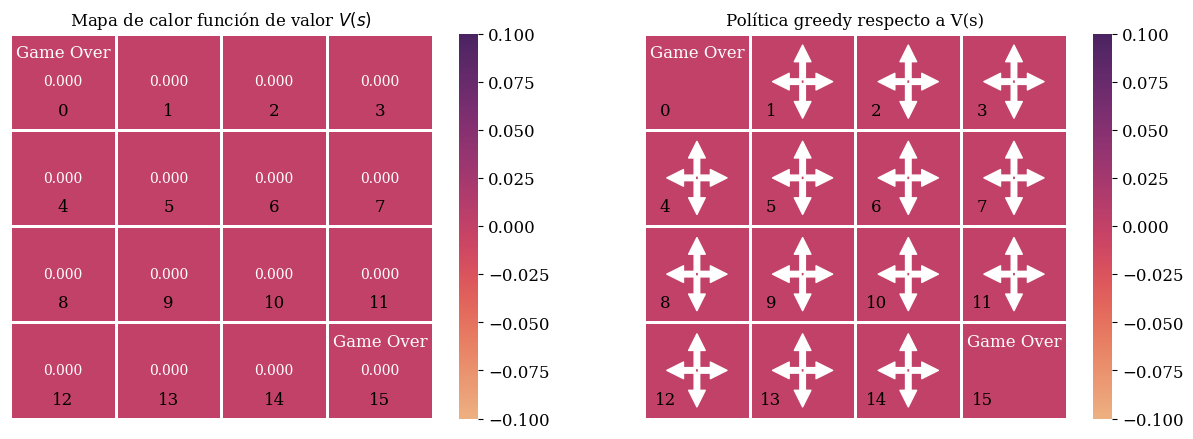

In [10]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 0)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

## Iteración 1

En la iteración 0 se realizó la inicialización de todos los estados en $V_0(s) = 0, \forall s \in S$, asumiendo que $\gamma = 1$ y que la recompensa es siempre -1 en todas las transiciones. Por lo tanto, se puede verificar que:

$V_1(s) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_0(s)) $
$ V_1(s) = \max_{a} \sum_{s'} p(s'|s,a)(-1+1 (0))$

$V_1(s) = \max_{a} \sum_{s'} p(s'|s,a)(-1)$

$V_1(s) = \max_{a} \left((-1)\sum_{s'} p(s'|s,a)\right)$

$V_1(s) = -1$

Esto se cumple para todos los estados no terminales. En estos estados, por definición, $V_1(s) = 0$. A continuación, se lleva a cabo la primera iteración del algoritmo y se muestran los resultados graficados en los mapas de calor. Además, se presenta la política greedy respecto a los valores de $V_1(s)$.


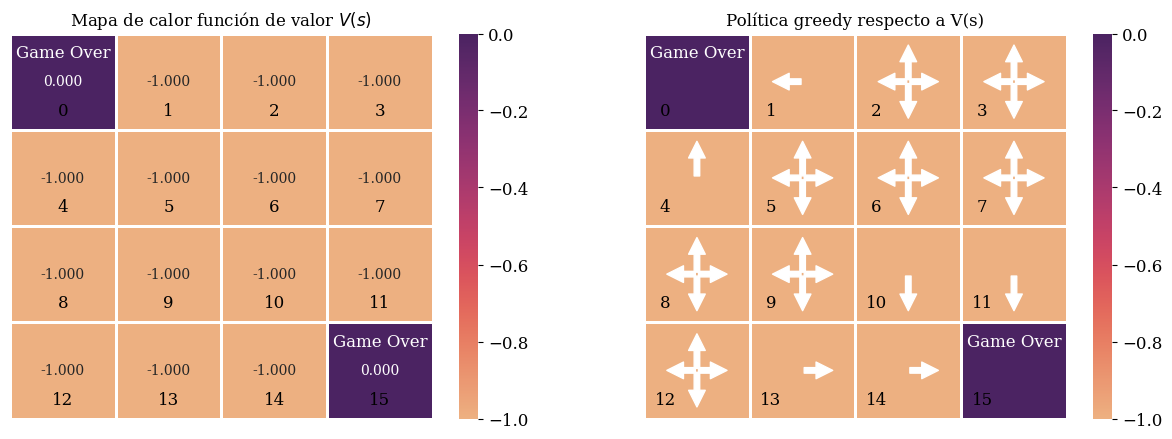

In [11]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 1)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [12]:
print(f'El máximo error de estimación entre la función V0(s) y V1(s) para algún s es: {sigma}')

El máximo error de estimación entre la función V0(s) y V1(s) para algún s es: 1.0


<p align="justify">
En la primera iteración se puede observar que hay un estado cuyo valor en la función $V$ difiere en una unidad con respecto a la iteración anterior. Este error es significativo y nos indica que el método aún no ha convergido.

## Iteración 2

En la segunda iteración los estados que tendrán cambios en la función de valor serán aquellos desde los que se pueda llegar a los estados finales, estos estados son 1, 4, 10, 11 y 14. Para los otros estados se cumple que:


$V_2(s) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$ V_2(s) = \max_{a} \sum_{s'} p(s'|s,a)(-1-1))$

$V_2(s) = \max_{a} \sum_{s'} p(s'|s,a)(-2)$

$V_2(s) = \max_{a} \left((-2)\sum_{s'} p(s'|s,a)\right)$

$V_2(s) = -2$

Para los otros estados se realizará el siguiente análisis:

**Estado 1:** En este estado la acción que conduce al estado terminal (el único con función de valor diferente) es la acción izquierda 'L'. Para esta acción se tiene:

$V_2(1) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$V_2(1) = \max_{a} \{ -2, -2, -2, \sum_{s'} p(s'|s,L)(-1+V_1(s)) \} $

$V_2(1) = \max_{a} \{ -2, -2, -2, p(0|1,L)(-1+V_1(0)) + p(1|1,L)(-1+V_1(1)) \} $

$V_2(1) = \max_{a} \{ -2, -2, -2, 0.8(-1) + 0.2(-1-1) \} $

$V_2(1) = \max_{a} \{ -2, -2, -2, -0.8 - 0.4 \}$

$V_2(1) = \max_{a} \{ -2, -2, -2, -1.2 \} $

$V_2(1) = -1.2 $

**Estado 4:** En este estado la acción que conduce al estado terminal (el único con función de valor diferente) es la acción izquierda 'U'. Para esta acción se tiene:

$V_2(4) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$V_2(4) = \max_{a} \{ -2, -2, -2, \sum_{s'} p(s'|s,U)(-1+V_1(s)) \} $

$V_2(4) = \max_{a} \{ -2, -2, -2, p(0|4,U)(-1+V_1(0)) + p(1|4,U)(-1+V_1(1)) \} $

$V_2(4) = \max_{a} \{ -2, -2, -2, 0.8(-1) + 0.2(-2) \} $

$V_2(4) = \max_{a} \{ -2, -2, -2, -0.8 - 0.4 \}$

$V_2(4) = \max_{a} \{ -2, -2, -2, -1.2 \} $

$V_2(4) = -1.2 $

**Estado 10:** En este estado la acción que conduce al estado terminal (el único con función de valor diferente) es la acción abajo 'D'. Para esta acción se tiene:

$V_2(10) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$V_2(10) = \max_{a} \{ -2, -2, -2, \sum_{s'} p(s'|s,D)(-1+V_1(s)) \} $

$V_2(10) = \max_{a} \{ -2, -2, -2, p(14|10,D)(-1+V_1(14)) + p(15|10,D)(-1+V_1(15)) \} $

$V_2(10) = \max_{a} \{ -2, -2, -2, 0.8(-2) + 0.2(-1) \} $

$V_2(10) = \max_{a} \{ -2, -2, -2, -1.6 - 0.2 \}$

$V_2(10) = \max_{a} \{ -2, -2, -2, -1.8 \} $

$V_2(10) = -1.8 $

**Estado 11:** En este estado la acción que conduce al estado terminal (el único con función de valor diferente) es la acción abajo 'D'. Para esta acción se tiene:

$V_2(11) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$V_2(11) = \max_{a} \{ -2, -2, -2, \sum_{s'} p(s'|s,D)(-1+V_1(s)) \} $

$V_2(11) = \max_{a} \{ -2, -2, -2, p(15|14,D)(-1+V_1(15)) \} $

$V_2(11) = \max_{a} \{ -2, -2, -2, 1(-1) \} $

$V_2(11) = \max_{a} \{ -2, -2, -2, -1 \}$

$V_2(11) = -1.0 $

**Estado 13:** En este estado la acción que conduce al estado terminal (el único con función de valor diferente) es la acción derecha 'R'. Para esta acción se tiene:

$V_2(13) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$V_2(13) = \max_{a} \{ -2, -2, -2, \sum_{s'} p(s'|s,R)(-1+V_1(s)) \} $

$V_2(13) = \max_{a} \{ -2, -2, -2, p(14|13,R)(-1+V_1(14)) + p(15|13,R)(-1+V_1(15)) \} $

$V_2(13) = \max_{a} \{ -2, -2, -2, 0.8(-2) + 0.2(-1) \} $

$V_2(13) = \max_{a} \{ -2, -2, -2, -1.6 - 0.2 \}$

$V_2(13) = \max_{a} \{ -2, -2, -2, -1.8 \} $

$V_2(13) = -1.8 $

**Estado 14:** En este estado la acción que conduce al estado terminal (el único con función de valor diferente) es la acción derecha 'R'. Para esta acción se tiene:

$V_2(14) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$V_2(14) = \max_{a} \{ -2, -2, -2, \sum_{s'} p(s'|s,R)(-1+V_1(s)) \} $

$V_2(14) = \max_{a} \{ -2, -2, -2, p(15|14,D)(-1+V_1(15)) \} $

$V_2(14) = \max_{a} \{ -2, -2, -2, 1(-1) \} $

$V_2(14) = \max_{a} \{ -2, -2, -2, -1 \}$

$V_2(14) = -1.0 $

A continuación, se lleva a cabo la segunda iteración del algoritmo y se muestran los resultados graficados en los mapas de calor. Además, se presenta la política greedy respecto a los valores de $V_2(s)$.

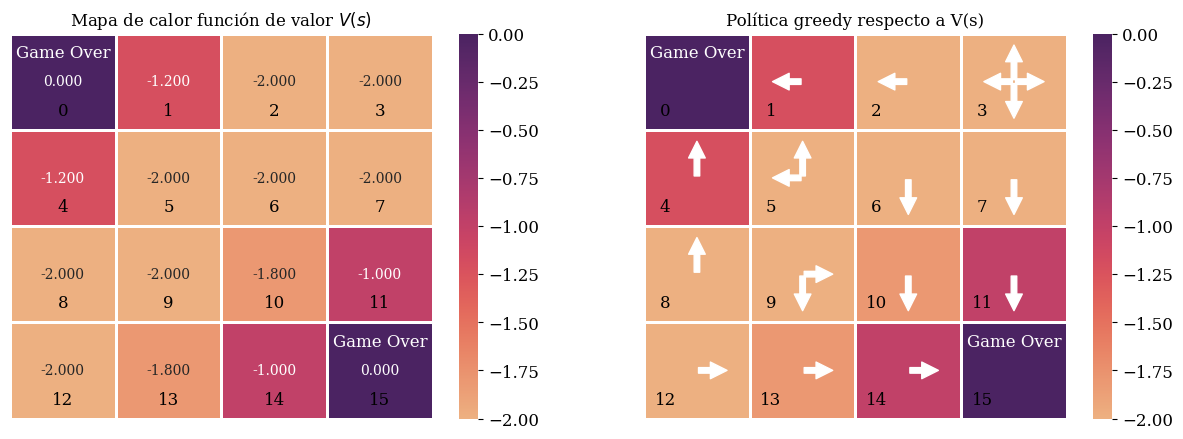

In [13]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 2)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [14]:
print(f'El máximo error de estimación entre la función V1(s) y V2(s) para algún s es: {sigma}')

El máximo error de estimación entre la función V1(s) y V2(s) para algún s es: 1.0


<p align="justify">
En la segunda iteración, al igual que en la anterior, se puede observar que hay un estado cuyo valor difiere en una unidad respecto al de la función $V$ en la iteración 1. Este error es significativo y sugiere que el método aún no ha convergido.

## Iteración 3

En la iteración 3 todos los estados, a excepción del 3, permiten llegar a estados con función de valor $V(s)$ diferente. Para el estado 3 se puede verificar que:

$V_3(3) = \max_{a} \sum_{s'} p(s'|s,a)(r+\gamma V_1(s)) $

$ V_3(3) = \max_{a} \sum_{s'} p(s'|s,a)(-1-2))$

$V_3(3) = \max_{a} \sum_{s'} p(s'|s,a)(-3)$

$V_3(3) = \max_{a} \left((-3)\sum_{s'} p(s'|s,a)\right)$

$V_3(3) = -3$

<p align="justify">
El cálculo de la función de valor para los estados distintos se realizará por medios computacionales. A continuación se exponen los resultados de la función de valor $V_3(s)$ y la política greedy en relación a esta función.

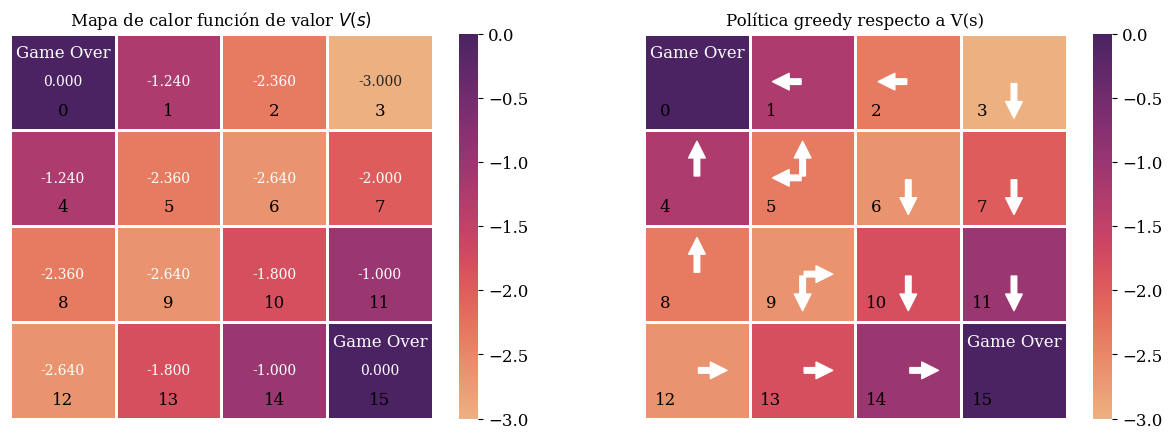

In [15]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 3)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [16]:
print(f'El máximo error de estimación entre la función V2(s) y V3(s) para algún s es: {sigma}')

El máximo error de estimación entre la función V2(s) y V3(s) para algún s es: 1.0


<p align="justify">
En la tercera iteración se puede observar que el error de aproximación persiste, ya que para algún estado $s$ existe una diferencia de 1 entre la función de valor $V_2(s)$ y $V_3(s)$. Este resultado indica que aún no se ha logrado una convergencia aproximada.

## Iteración 4

El cálculo de la función de valor para esta iteración se realiza computacionalmente. A continuación se exponen los resultados de la función de valor $V_4(s)$ y la política greedy en relación a esta.

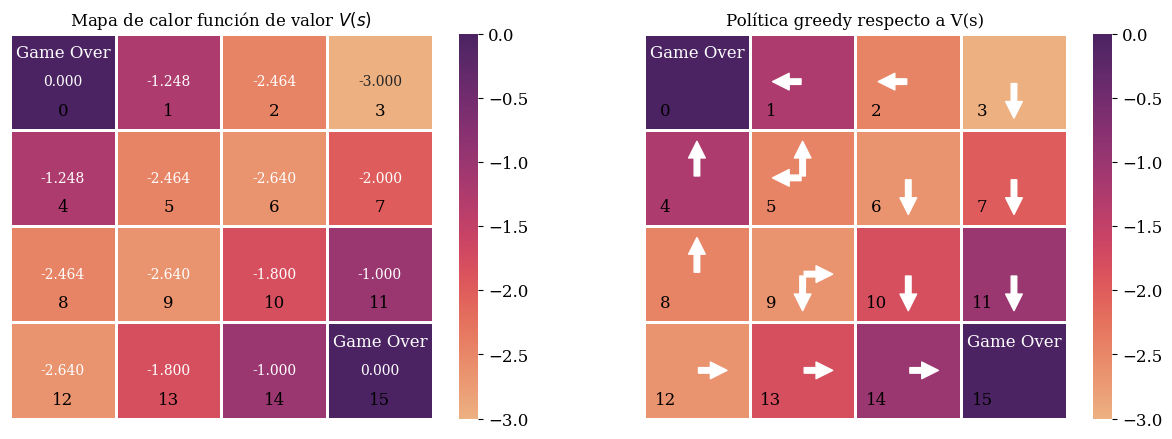

In [17]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 4)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [18]:
print(f'El máximo error de estimación entre la función V3(s) y V4(s) para algún s es: {sigma:0.3f}')

El máximo error de estimación entre la función V3(s) y V4(s) para algún s es: 0.104


<p align="justify">
En la cuarta iteración del algoritmo, se puede observar que la función de valor de algún estado $s$ solo difiere en 0.104 de la función estimada en la iteración 3. Este valor indica la mayor diferencia, lo que sugiere que los demás estados se comportan de manera muy similar a los valores encontrados en $V_3(s)$. Sin embargo, si se desea una convergencia aproximada más rigurosa, se espera que el error de aproximación sea aún menor. Por esta razón, se lleva a cabo una nueva iteración.

## Iteración 5

El cálculo de la función de valor para esta iteración se realiza computacionalmente. A continuación se exponen los resultados de la función de valor $V_5(s)$ y la política greedy en relación a esta.

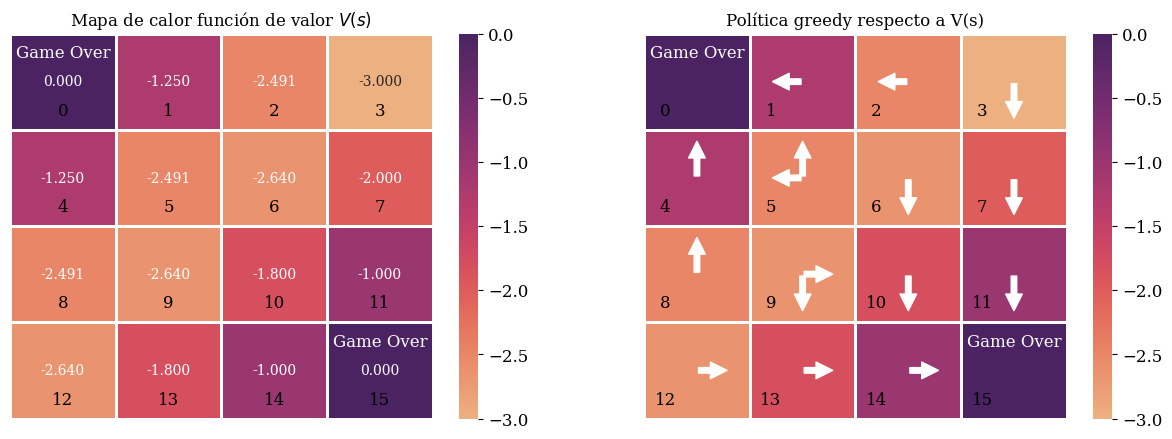

In [19]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 5)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [20]:
print(f'El máximo error de estimación entre la función V4(s) y V5(s) para algún s es: {sigma:0.3f}')

El máximo error de estimación entre la función V4(s) y V5(s) para algún s es: 0.027


<p align="justify">
En esta iteración, la máxima diferencia entre $V_4(s)$ y $V_5(s)$ para algún estado $s$ es de 0.027. Este resultado sugiere que las funciones de valor son bastante similares numéricamente hablando. Sin embargo, se realizará una nueva iteración para evaluar cómo se comportan los valores. Es importante destacar que desde la iteración 3, la política greedy respecto $V(s)$ no ha experimentado cambios.

## Iteración 6

Los cálculos de la función de valor para esta iteración se efectúan mediante procesamiento computacional. Posteriormente, se muestran los resultados de la función de valor $V_6(s)$ junto con la política greedy correspondiente.

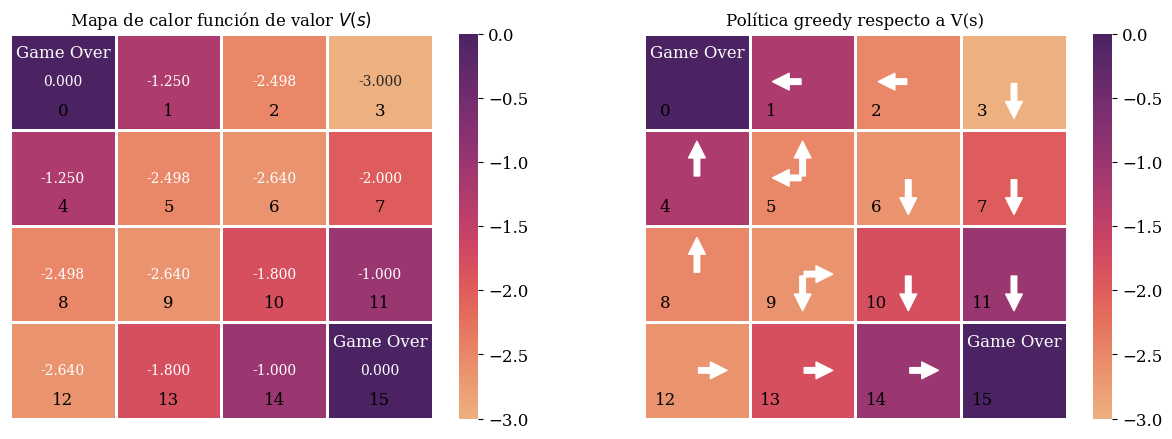

In [21]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 6)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [22]:
print(f'El máximo error de estimación entre la función V5(s) y V6(s) para algún s es: {sigma:0.4f}')

El máximo error de estimación entre la función V5(s) y V6(s) para algún s es: 0.0067


<p align="justify">
En la iteración 6, el error disminuye aún más y se sitúa en un valor de 0.0067. Este valor es lo suficientemente pequeño para afirmar que la función $V(s)$ ha convergido aproximadamente. No obstante, se realiza una nueva iteración.

## Iteración 7

En la iteración 7 también se lleva a cabo el cálculo computacional de $V_7(s)$. De manera similar a las iteraciones anteriores, se presentan los resultados de la función $V_7(s)$ y la política greedy correspondiente en forma de mapas de calor.

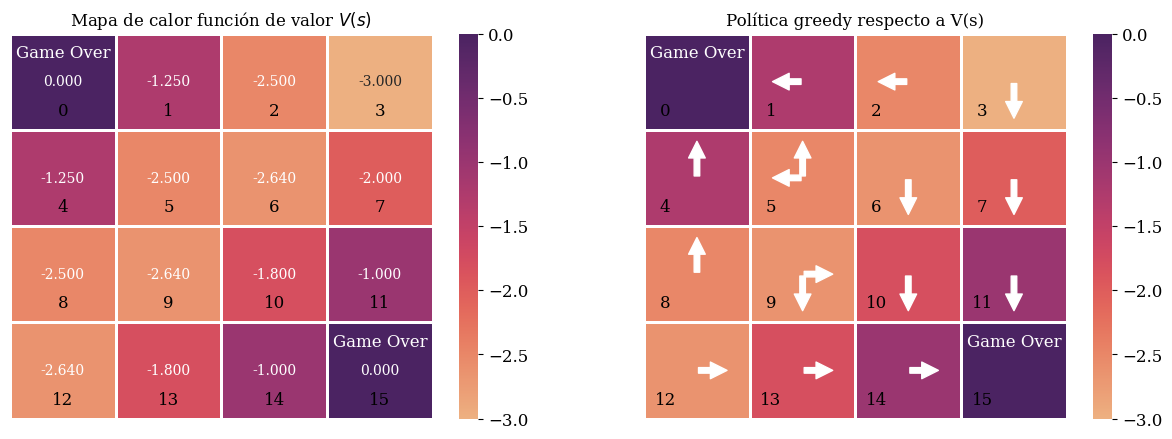

In [23]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 7)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [24]:
print(f'El máximo error de estimación entre la función V6(s) y V7(s) para algún s es: {sigma:0.4f}')

El máximo error de estimación entre la función V6(s) y V7(s) para algún s es: 0.0016


<p align="justify">
En la iteración 7, se obtiene una máxima diferencia de 1.6e-3 para algún estado $s$ entre $V_6(s)$ y $V_7(s)$. Este valor pequeño indica que el método ha convergido, ya que la función $V$ estimada difiere muy poco de la lograda en la iteración anterior. Por último, se realizan 20 iteraciones adicionales del método y se comprueba que los resultados obtenidos coinciden aproximadamente con los obtenidos en la iteración 7 para la función $V$, y exactamente para la política encontrada.

## Iteración 20

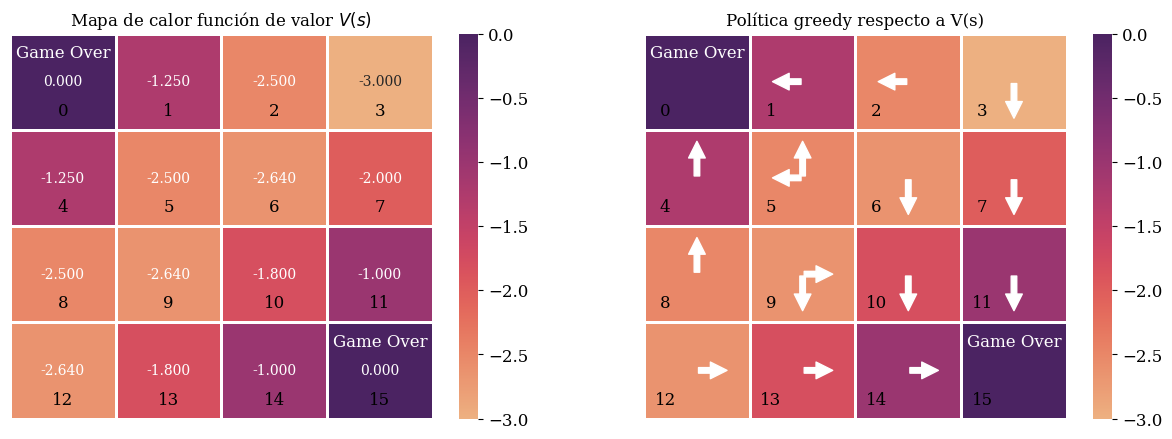

In [25]:
values, policy, sigma, sigmas = betterPolicyValueIteration(boardState, 1, probabilitiesTransition, 20)
matrixVs, matrixState = makeMatrixVs(values)
visualizatedPolicy(policy, matrixVs, matrixState)

In [26]:
print(f'El máximo error de estimación entre la función V19(s) y V20(s) para algún s es: {sigma}')

El máximo error de estimación entre la función V19(s) y V20(s) para algún s es: 4.037215006746919e-12


<p align="justify">
El algoritmo ha alcanzado convergencia en la iteración 20, como se puede evidenciar en el error máximo de aproximación para algún estado $s$, que es del orden de $10^{-12}$. Además, la función de valor $V_{20}(s)$ es numéricamente idéntica a la función $V_7(s)$, lo que respalda aún más la convergencia aproximada del algoritmo desde la iteración 7. Es importante destacar que la política greedy, en este punto considera la política óptima,se ha mantenido desde la iteración 3.

<p align="justify">
Para visualizar la convergencia del algoritmo, se presentan graficamente los errores máximos de estimación de la función $V(s)$ en cada iteración. Se puede observar que a partir de la iteración 7, el error se ubica cerca de 0, lo que indica una convergencia aproximada del algoritmo. Esto sugiere que el método ha logrado estimar de manera precisa la función $V_{\star}(s)$ y, por lo tanto, la política asociada $\pi_{s}$ puede tambien considerarse óptima. 

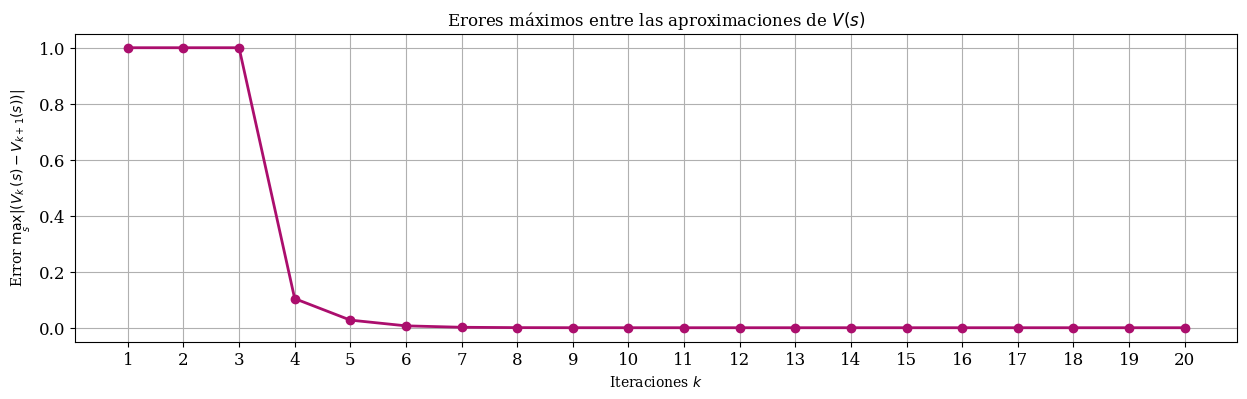

In [27]:
plt.figure(figsize=(15,4))
plt.plot(range(1,21), sigmas, color = '#AB0E6D', marker = 'o', linewidth = 2)
plt.title(r'Erores máximos entre las aproximaciones de $V(s)$')
plt.xlabel(r'Iteraciones $k$')
plt.xticks(range(1,21))
plt.ylabel(r'Error $\max_{s}|(V_{k}(s)-V_{k+1}(s))|$')
plt.grid()
plt.show()

# Interfaz 

Para facilitar la visualización estos mismos resultados se presentan en una interfaz web en el link [Link interfaz web](https://mavivi95-gridworld-app-4mcg28.streamlit.app/). En la interfaz se pueden fijar el número de iteraciones y el valor $\gamma$. Para cada iteración se muestran los resultados de la función de valor y la política greedy respecto a este valor, también se indica la gráfica de los errores de estimación. 